In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


In [13]:
import tensorflow as tf
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory='D:/Programming/Project/Cat VS Dog Image Classification/archive/train',  # Use forward slashes
    labels='inferred',  # Corrected from 'label' to 'labels'
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='D:/Programming/Project/Cat VS Dog Image Classification/archive/test',  # Use forward slashes
    labels='inferred',  # Corrected from 'label' to 'labels'
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 405 files belonging to 2 classes.
Found 411 files belonging to 2 classes.


In [15]:
#normalization
def process(image,label):
    image = tf.cast(image/255.0,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,BatchNormalization

# Create CNN Model
model = Sequential()

# First Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Second Conv Layer
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Third Conv Layer
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten the layers
model.add(Flatten())

# Fully connected Dense layer
model.add(Dense(128, activation='relu'))

# Correct Dropout usage (fraction between 0 and 1)
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# Output Layer (Binary Classification)
model.add(Dense(1, activation='sigmoid'))  # Since it’s a binary classification (Cats vs Dogs)

# Summary of the Model
model.summary()


d:\Programming\Project\Cat VS Dog Image Classification\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5650 - loss: 5.4250 - val_accuracy: 0.6204 - val_loss: 0.7052
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6175 - loss: 2.9278 - val_accuracy: 0.6204 - val_loss: 0.7894
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6206 - loss: 2.1288 - val_accuracy: 0.6204 - val_loss: 0.7985
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7367 - loss: 1.9885 - val_accuracy: 0.6204 - val_loss: 1.3437
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7097 - loss: 1.4489 - val_accuracy: 0.6204 - val_loss: 1.7126
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7364 - loss: 1.2924 - val_accuracy: 0.6204 - val_loss: 1.8933
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7374 - loss: 1.5178 - val_accuracy: 0.6204 - val_loss: 1.9345
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7099 - loss: 1.3228 - val_accuracy: 0.6204 - val_loss:

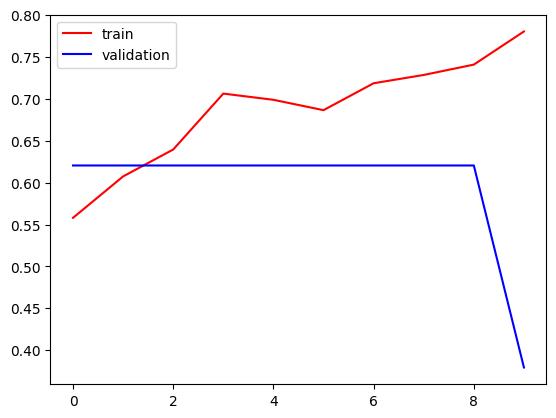

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

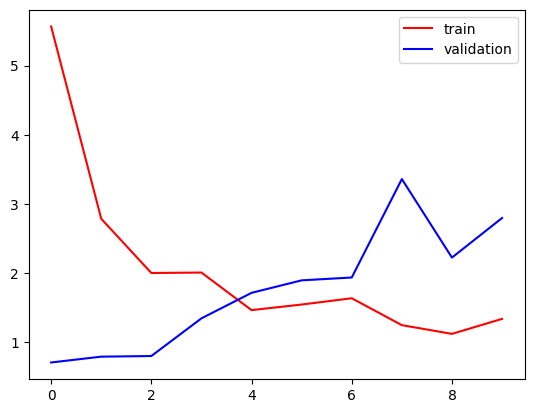

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

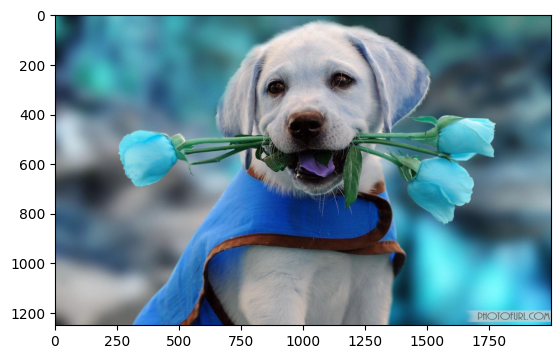

In [44]:
import cv2 

test_img = cv2.imread(r'D:/Programming/Project/Cat VS Dog Image Classification/dog1.jpg')

plt.imshow(test_img)

In [45]:
test_img.shape

(1250, 2000, 3)

In [46]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [47]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[1.]], dtype=float32)

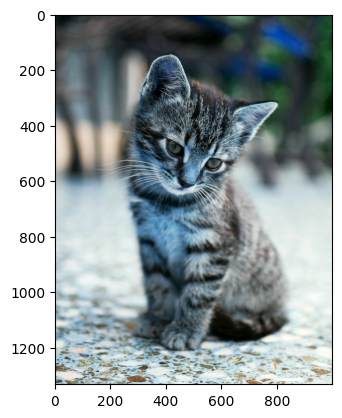

In [55]:
import cv2 

test_img = cv2.imread(r'D:/Programming/Project/Cat VS Dog Image Classification/cat.jpg')

plt.imshow(test_img)

In [56]:
test_img.shape

(1333, 1000, 3)

In [57]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [58]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[1.]], dtype=float32)